# ADP 실기 23회 머신러닝

데이터 : 객실 사용 여부 관련 데이터
- 온, 습도, 조도, CO2농도에 따른 객실의 사용유무 판별
- 종속변수 Occupancy (0: 비어있음 , 1: 사용중)

In [170]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


## 1-1) 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


In [173]:
df['date'] = pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17910 non-null  datetime64[ns]
 1   Temperature    17910 non-null  float64       
 2   Humidity       17910 non-null  float64       
 3   Light          17910 non-null  float64       
 4   CO2            17889 non-null  float64       
 5   HumidityRatio  17910 non-null  float64       
 6   Occupancy      17910 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 979.6 KB
None


In [174]:
print(df.isnull().sum(), "\n")

# CO2 컬럼이 결측치인 데이터의 날짜 값을 출력 (결측치가 어느 날짜에 발생했는지를 파악)
print(df[df.CO2.isnull()].date.values)

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64 

['2015-02-03T19:09:59.000000000' '2015-02-03T19:31:00.000000000'
 '2015-02-04T18:08:00.000000000' '2015-02-05T06:08:00.000000000'
 '2015-02-05T16:09:59.000000000' '2015-02-08T08:06:00.000000000'
 '2015-02-08T11:54:00.000000000' '2015-02-08T20:58:59.000000000'
 '2015-02-09T06:04:59.000000000' '2015-02-09T07:31:00.000000000'
 '2015-02-09T07:49:00.000000000' '2015-02-10T07:53:59.000000000'
 '2015-02-12T00:34:00.000000000' '2015-02-12T10:53:00.000000000'
 '2015-02-12T15:04:00.000000000' '2015-02-12T20:38:00.000000000'
 '2015-02-13T22:53:59.000000000' '2015-02-15T16:41:59.000000000'
 '2015-02-16T00:53:59.000000000' '2015-02-17T01:56:00.000000000'
 '2015-02-18T06:20:00.000000000']


- CO2 칼럼에 21개의 결측치가 존재함을 확인하였다. 
- 이 결측치들이 특정 일자에 걸쳐 나타나거나 연속적으로 분포한다면, 해당 기간에 대한 데이터를 제거하는 방법이 분석에 효율적일 것으로  고려된다.
- 하지만 결측치가 불규칙적으로 분포되어 있으므로 해당 기간의 데이터를 아예 제거하는 것보다는, 대체하는 방식을 고려하는 게 적절하다고 판단했다.

<Axes: >

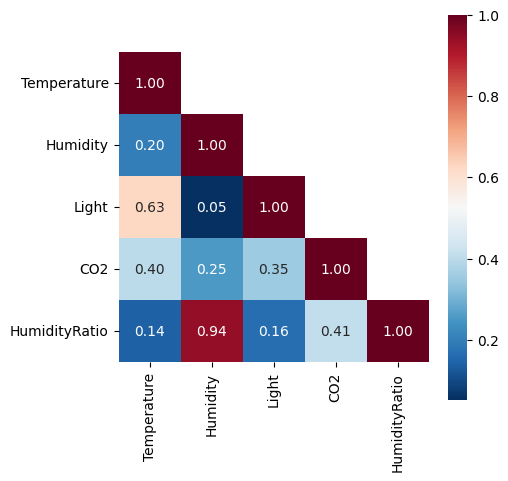

In [175]:
# 상관관계 시각화 : 히트맵
plt.figure(figsize=(5, 5))

# corr matrix 생성
corr_matrix = df.drop(['Occupancy'], axis=1).corr().abs() # .abs() 붙으면 절댓값 기준으로 생성

# 상삼각행렬 반환
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

# 상삼각행렬을 마스킹하여 하삼각행렬만 시각화
# annot=True는 각 셀에 상관계수 표시
# fmt=.0%는 퍼센트, 2f는 소수점 둘째자리까지로 표시될 값의 형식을 지정, cmap은 색상 조정
sns.heatmap(corr_matrix, mask=up_mask, annot=True, fmt='.2f', square=True, cmap='RdBu_r')

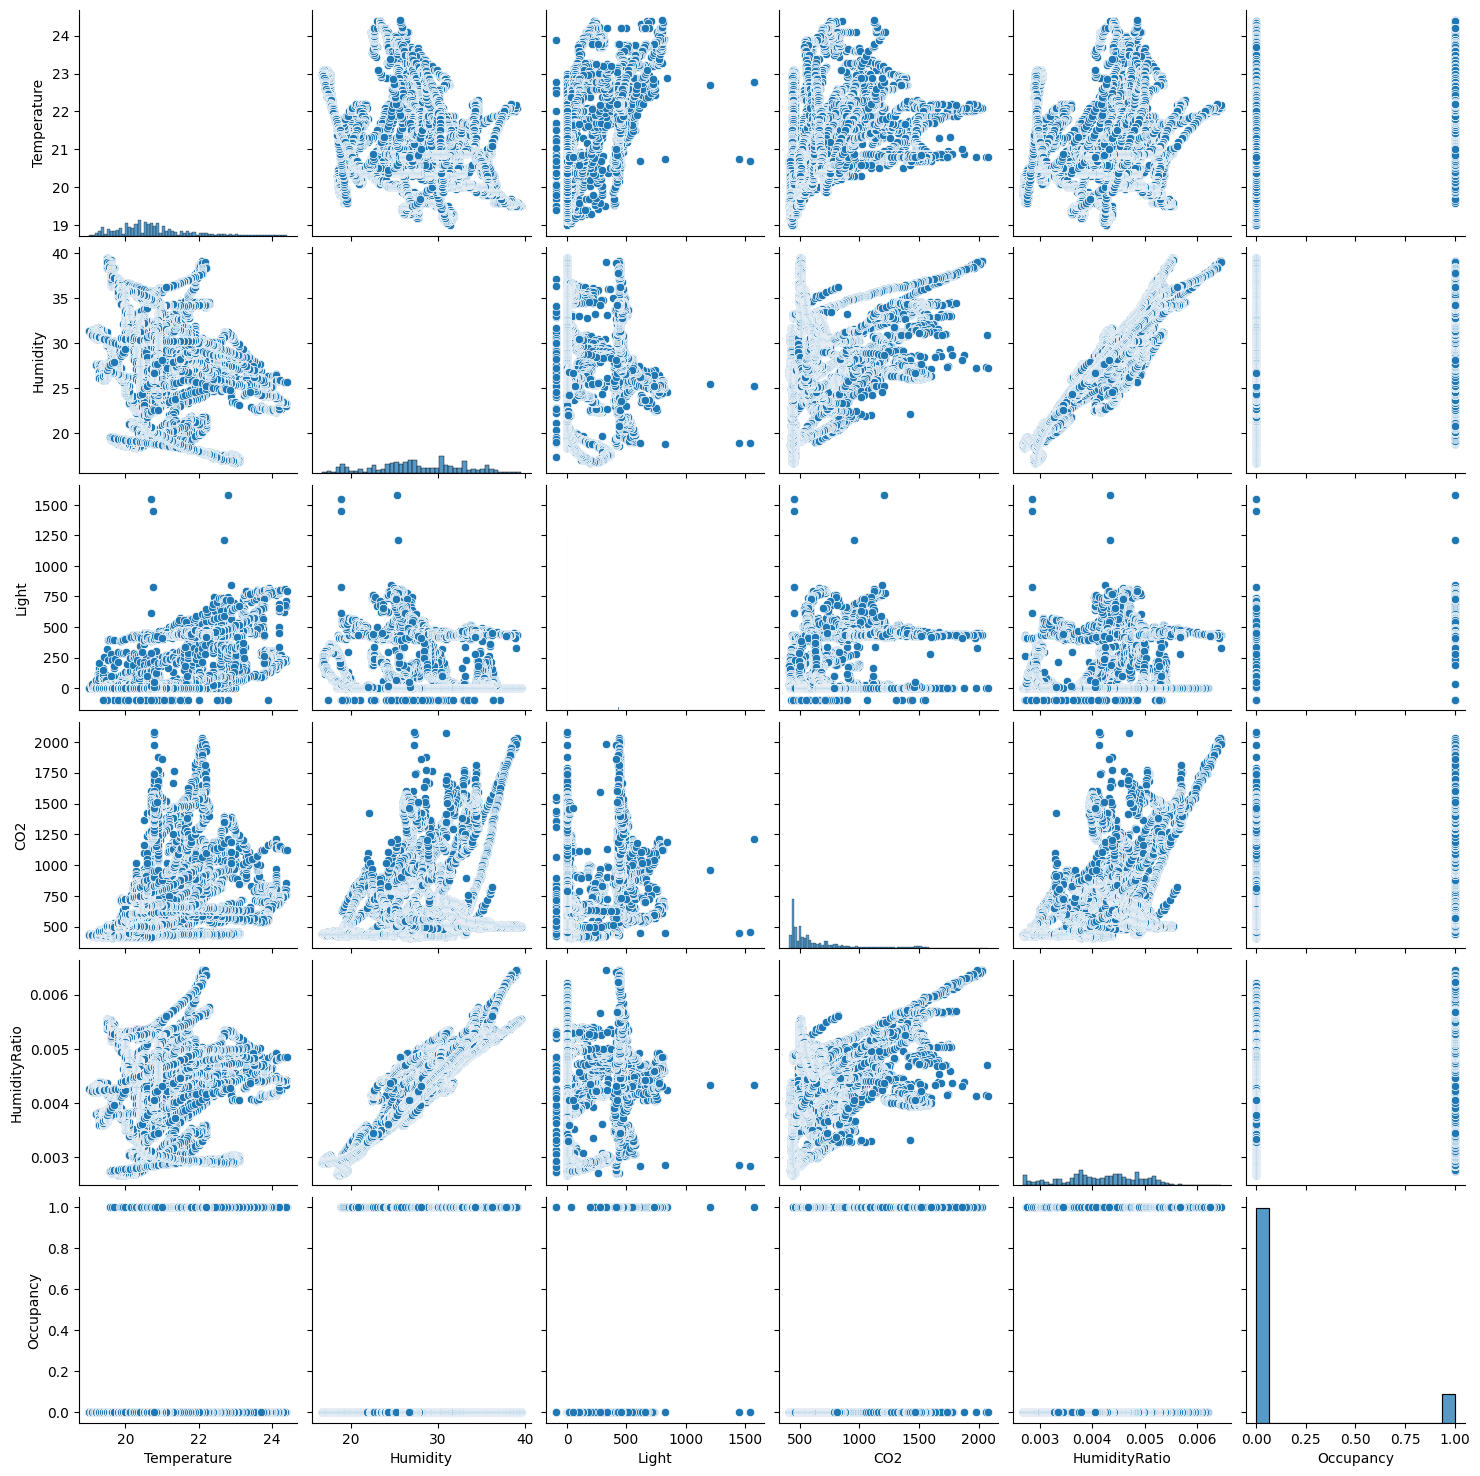

In [176]:
# pairplot 
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

- 변수 간 관계를 히트맵과 pairplot으로 시각화했을 때, Humidity와 HumidityRatio 간에 0.9 이상의 강한 상관관계를 확인할 수 있었다.

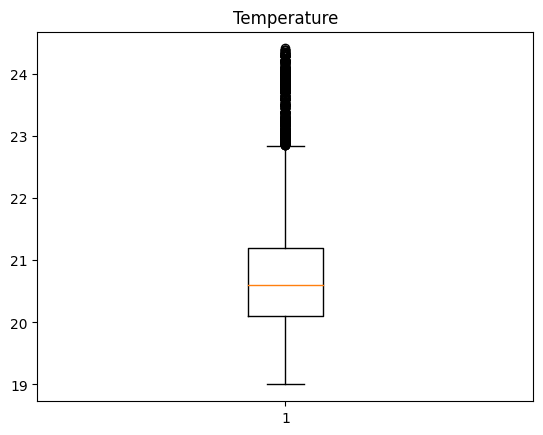

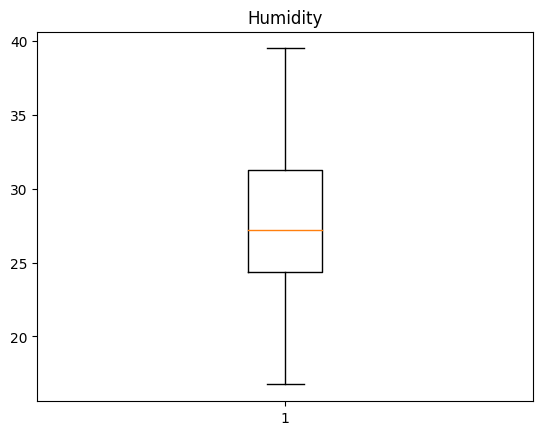

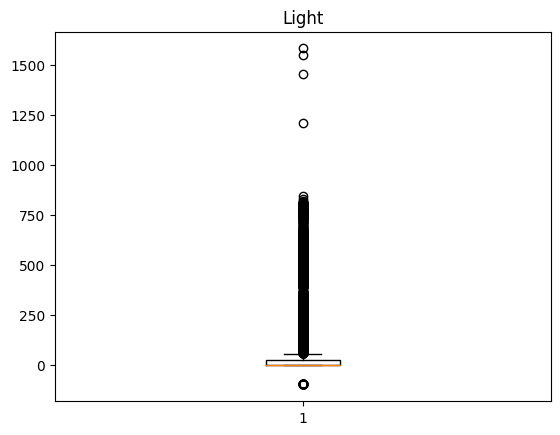

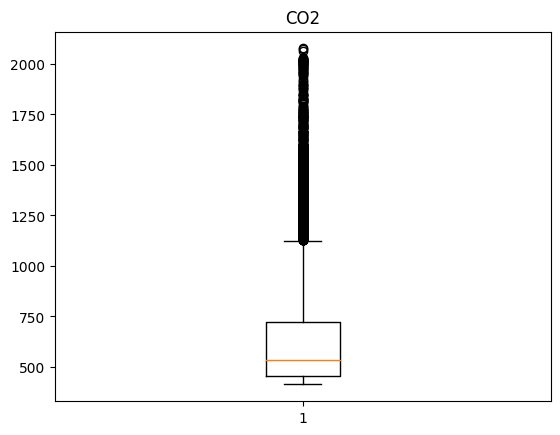

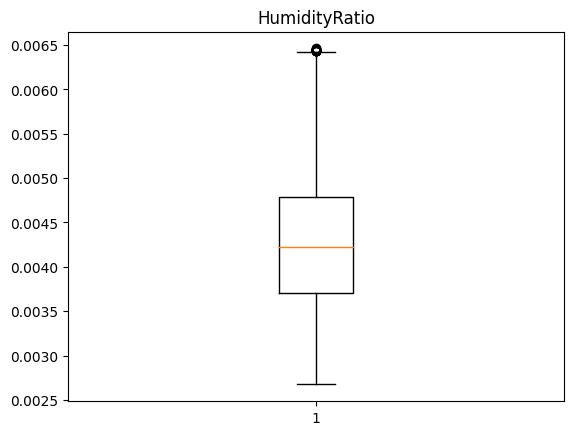

In [177]:
for v in df.select_dtypes(include='float'):
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()

In [178]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


In [179]:
print(df[df.Light <0].shape)

(50, 7)


In [180]:
df.loc[df.Light ==-99,'Light'] = df.Light.median()
df.describe() # -99가 중앙값으로 잘 변환됐는지 확인 

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.433750,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.364401,285.997340,0.000755,0.321730
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


- Boxplot 시각화한 결과, 대부분 변수에서 이상치로 고려될 데이터가 꽤 분포해있었고 특히 Light 변수에만 0 미만의 데이터가 있는 것을 확인할 수 있었다. 
- Light 변수의 0 미만인 데이터의 개수는 50개로 확인되었다.
- Light 컬럼의 -99는 예외값 혹은 결측값에 대해 임의의 값으로 입력한 것으로 보인다. 따라서, -99를 제외한 컬럼의 중앙값으로 대체하는 것이 옳다고 판단했다.

### 1-2) 결측치를 대체하는 방식 선택하고 근거제시, 대체 수행
- 위 단계에서 결측치를 확인한 결과, CO2 칼럼에서 21개의 결측치가 발견됐다.
- 결측값을 평균으로 대체 시 이상치의 영향을 받아 데이터가 왜곡될 수 있으므로 median으로 대체하는 방법을 고려했다.

In [181]:
df['CO2'] = df['CO2'].fillna(df['CO2'].median()) # 결측치를 중앙값으로 대체
print(df.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [182]:
# 다른 관점 & 방법 : 시계열적인 특징을 고려
# CO2 값이 변하지 않는 경우나 짧은 시간 내에 연속적인 경우라서 -99값으로 기록될 가능성을 고려해, 
# 이전 데이터의 CO2 값을 사용하여 결측치를 대체하는 방법이 적절하다고 생각한다. 
# 데이터의 일부가 손실되는 것보다 결측치 대체를 통해 더 많은 데이터를 보존할 수 있다.

# CO2가 null인 행의 값을 이전 행의 CO2 값으로 채워넣는 작업을 수행
# Occupancy 값이 변하지 않았고(target 데이터프레임의 Occupancy 열에 대해 유일한 값이 하나)
# CO2 값이 중간에 누락된 시간이 3분 이상이 아닌 경우에만 값을 채움

# for value in df[df.CO2.isnull()].index:
#     target = df.iloc[value-1:value+2]

# target 데이터프레임에서 날짜(date) 컬럼 간의 차이(diff)를 구함
#     difftime = target['date'].diff().dt.seconds.dropna() 
#     if target.Occupancy.nunique() ==1 and len(difftime[difftime>180]) ==0:
#         df.loc[value,'CO2'] =df.loc[value-1].CO2

### 1-3) 추가적으로 데이터 품질을 향상시킬만한 내용 작성
#### 1) 다중공선성 문제 고려
Humidity와 HumidityRatio 간에 0.9 이상의 강한 상관관계를 확인할 수 있었고, 변수 간 상관관계가 높으면 다중공선성이 발생해 예측 성능에 문제를 일으킬 수 있다. 따라서 추후 다중공선성을 제거하기 위해 차원축소나 변수 선택법 등의 방법을 고려해야한다.
#### 2) 추가 데이터 수집
절대적인 데이터 양이 증가하면 조금 더 다양한 데이터를 얻을 수 있어, 모델이 더 일반화된 학습을 할 수 있도록 하며 생성된 모델이 적용되었을때 발생할 수 있는 과적합 문제를 해결할 수 있다. 
#### 3) 파생 변수 생성
파생 변수를 생성하는 것은 데이터에서 유의미한 정보를 더 추출하여 예측 모델의 성능을 높이는 방법 중 하나이다. 도메인 전문가와 협력하여 데이터에서 유용한 정보를 추출하고 새로운 변수를 생성해 데이터의 품질을 향상시킬 수 있다.
#### 4) 도메인 전문가와 협력하여 이상치 제거 및 처리 논의
boxplot으로 변수들의 이상치를 확인해봤을 때, 이상치로 고려되는 데이터들이 많이 분포해있었다. 하지만 많은 값이 연속적으로 연달아 있는 경우가 있어 단순히 제거하고 대체하는 것이 아니라, 도메인 전문가에게 자문을 구해 섬세하게 이상치를 조정한다면 데이터 품질을 향상시킬 수 있을 것으로 생각한다.

### 2-1) 데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성

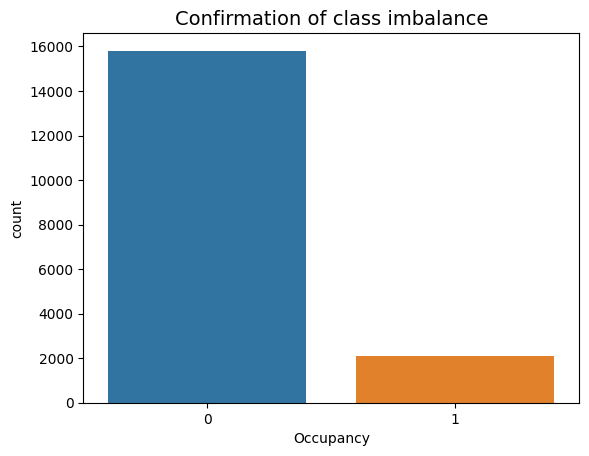

0 비율: 88.27%
1 비율: 11.73%


In [183]:
# 불균형 수치 확인 및 시각화

sns.countplot(x='Occupancy', data = df)
plt.title('Confirmation of class imbalance', fontsize =14)
plt.show()
ratio0 = round(len(df[df['Occupancy']==0])/len(df)*100, 2)
ratio1 = round(len(df[df['Occupancy']==1])/len(df)*100, 2)
print('0 비율: {}%'.format(ratio0))
print('1 비율: {}%'.format(ratio1))

- 불균형 정도를 시각화하고 비율을 산출한 결과, 0과 1의 비율이 약 88:12로 0의 값이 훨씬 더 많이 분포하고 있음을 확인할 수 있고 이는 데이터가 불균형한 구조를 가진다고 판단할 수 있다. 따라서 클래스 불균형 문제를 해결하기 위해 샘플링 방법을 고려해야할 필요성이 있다.

## 2-2) 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

### 오버샘플링
- 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 데이터 불균형을 극복하는 방식
- 불균형 데이터셋에서 분류 모델의 성능을 향상시키기 위한 오버 샘플링 방법을 이용

#### 1) Random Oversampling
- 기존에 존재하는 소수의 클래스를 단순 복제하여 클래스가 불균형하지 않도록 비율을 맞춰주는 방법
- 장점
    - 쉽게 구현할 수 있다.
    - 다른 오버샘플링 기법들과 비교해서 빠른 속도로 학습이 가능하다.
- 단점
    - 동일한 소수 클래스 데이터가 단순 복제되기 때문에, 과적합 문제가 발생할 수 있다.

#### 2) SMOTE

- 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서, 해당 데이터와 K개의 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식
- 장점
    - 소수 클래스의 데이터를 단순히 복제하는 것이 아니라, 소수 클래스 데이터의 변형을 적용하므로 과적합 문제가 적음
- 단점
    - Resampling 방식보다 처리속도가 느릴 수 있다.
    - 고차원 데이터에는 문제가 발생할 수 있다.


### 2-3) 오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

- 'date' 열은 일반적으로 학습 및 예측에 직접적으로 사용되지 않는 데이터이므로, 해당 열을 제외하고 데이터를 사용

In [184]:
# 먼저 train과 test 데이터 분리 후, trian 데이터에만 오버샘플링 진행
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE

# date 칼럼은 모델 학습 및 예측, 샘플링에 직접적으로 사용 X
X = df.drop(columns=['Occupancy', 'date'])
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, # y 변수(타겟 변수)의 클래스 분포를 유지
                                                    random_state=23,
                                                    test_size=0.3)

In [191]:
print('Original Data')
print(y_train.value_counts()) # .value_counts(normalize=True)는 비율로 출력

Original Data
0    11067
1     1470
Name: Occupancy, dtype: int64


In [190]:
# 랜덤오버샘플링
X_ROS, y_ROS = RandomOverSampler(random_state=2023).fit_resample(X_train, y_train)
print('After Random Over Sampling')
print(y_ROS.value_counts())

print()

# SMOTE
X_SMO, y_SMO = SMOTE(random_state=2023).fit_resample(X_train,y_train)
print('After SMOTE')
print(y_SMO.value_counts())

After Random Over Sampling
0    11067
1    11067
Name: Occupancy, dtype: int64

After SMOTE
0    11067
1    11067
Name: Occupancy, dtype: int64


- 원래 클래스, 랜덤오버샘플링 후의 클래스, SMOTE 후의 클래스를 비교한 결과 오버샘플링이 잘 적용된 걸 확인할 수 있다.

### 3-1) 속도 측면, 정확도 측면 모델 1개씩 선택하고 선택 이유도 기술
- 클래스 0, 1의 이진분류 문제
- 속도 측면 : 로지스틱 회귀 
    - 로지스틱 회귀 모델은 단순한 모델 구조를 가지고 있기 때문에, 이진분류에서 빠른 속도를 보일 것으로 예상하여 속도 측면에서는 로지스틱 회귀모델을 선택했다.
- 정확도 측면 : 랜덤포레스트
    - 랜덤포레스트는 결정 트리의 앙상블 모델이다. 다양한 결정 트리를 사용하므로, 각 결정 트리의 예측 결과를 조합하여 최종 예측 결과를 도출한다. 
    - 따라서 랜덤 포레스트는 데이터의 노이즈나 이상치에 덜 민감하며, 일반적으로 높은 정확도를 보이는 성향이 있다. 따라서 정확도 측면에서는 랜덤 포레스트를 선택했다.

### 3-2) 위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 원데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [192]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

result_auc_train = []
result_auc_test = []
result_time = []

for model_train_X, model_train_y in [(X_train, y_train),(X_ROS, y_ROS),(X_SMO, y_SMO)]:
    
    trainX = model_train_X.copy()
    testX = X_test.copy()
    
    # 스케일러 적용
    sc = MinMaxScaler()    
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
    
    # 로지스틱 회귀
    lr_start = time.time()
    lr = LogisticRegression()
    lr.fit(trainX, model_train_y)
    lr_end = time.time() - lr_start

    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(trainy,lr.predict(trainX))
    auc_lr = roc_auc_score(y_test,pred_lr)
    
    # 랜덤포레스트
    rf_start = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainX,train_y)
    rf_end = time.time() - rf_start
    
    pred_rf  = rf.predict(testX)
    auc_rf_train  = roc_auc_score(trainy,rf.predict(trainX))
    auc_rf  = roc_auc_score(y_test,pred_rf)
    
    result_auc_test.append([auc_lr,auc_rf])
    result_time.append([lrend,rfend])
    result_auc_train.append([auc_lr_train,auc_rf_train])

In [195]:
# logistic regression 과 randomforest를 샘플링방식에 따른
# 학습시 정확도와 모델 학습 시간에 대해서 평가

print('훈련셋 모델 auc 결과')
result_auc_trains = pd.DataFrame(result_auc_train)
result_auc_trains.index = ['raw','randomSampling','SMOTE']
result_auc_trains.columns = ['logistic','randomforest']
display(result_auc_trains)

print('테스트셋 모델 auc 결과')
result_auc_tests = pd.DataFrame(result_auc_test)
result_auc_tests.index = ['raw','randomSampling','SMOTE']
result_auc_tests.columns = ['logistic','randomforest']
display(result_auc_tests)

print('모델 학습시간 (sec)')
result_times = pd.DataFrame(result_time)
result_times.index = ['raw','randomSampling','SMOTE']
result_times.columns = ['logistic','randomforest']
result_times

훈련셋 모델 auc 결과


,logistic,randomforest
raw,0.985894,1.0
randomSampling,0.989292,1.0
SMOTE,0.990603,1.0


테스트셋 모델 auc 결과


,logistic,randomforest
raw,0.983413,0.987208
randomSampling,0.986910,0.990172
SMOTE,0.986910,0.989750


모델 학습시간 (sec)


,logistic,randomforest
raw,0.073607,1.791573
randomSampling,0.066226,3.566767
SMOTE,0.073913,7.651595


### 3-3) 위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라

- train셋의 경우 로지스틱 회귀와 랜덤포레스트 모두 auc가 0.9 이상으로 확인되며, 오버샘플링을 적용하지 않은 경우보다 적용한 경우의 모델 auc가 높게 나온 것을 확인할 수 있다. 따라서, 오버샘플링이 예측 결과에 유의미한 영향을 끼쳤다고 말할 수 있다.
- test셋의 경우에도 오버샘플링을 적용하지 않은 경우보다 적용한 경우의 모델 auc가 높게 나온 것을 확인할 수 있다. 
- logistic regression의 경우 학습시간은 random forest에 비해 낮게 나왔고, 속도 측면에서 로지스틱 회귀를 선택한 것이 적절했다고 말할 수 있다.